<a href="https://colab.research.google.com/github/IndraLukasTjahaja/Digital_Credit_Risk/blob/main/Bab%202%20-%20Credit%20Scoring%20Modeling%20dengan%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
# 2.3.2.1 Persiapan data dan impor ke Python

In [198]:
# 2.3.2.2 Impor data di Python

# library panda untuk menggunakan data frame
import pandas as pd

# Impor data dari excel xls ke Python
# Pembaca dapat langsung menunjuk kepada file excel yang terletak di website pendamping buku ini
# atau mengunduh terlebih dahulu dan menunjuk ke file excel di lokasi hard drive
# contoh: df = pd.read_excel('C:\User\pembaca\downloads\Credit_Scoring_Dataset.xlsx')

df = pd.read_excel('https://github.com/IndraLukasTjahaja/Digital_Credit_Risk/raw/main/Credit_Scoring_Dataset.xlsx')

In [199]:
# 2.3.2.3 Struktur data

# Melihat sample dari dataset
df.head(10) # Menampilkan 10 baris teratas dari dataframe df

,ID,gagal_bayar,Lama_Cicilan,Tujuan_Pinjaman,Jumlah_Pinjaman,Pekerjaan,Pendapatan_perbulan,Lama_Bekerja,Status,Kepemilikan_Rumah,Alamat_Rumah,Alamat_Kantor,Usia,Lama_tinggal_ditempat_sekarang,SLIK_Kolektibilitas,SLIK_Cicilan_Bulanan,SLIK_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Type,Device_Apps_Installed,Device_Active_Since,Device_Apps_Segmentation,Mobile_Provider,Mobile_Number_Active_Since,Email_Domain_Type
0,ABC0001,0_Bayar,1,elektronik,500000,1_pegawai_tetap,5. >20 juta,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_3,Daerah_3,67.0,4_>10_tahun,Kolek 1,859684.752267,0.000000e+00,305,192,Android,6,2_1_ke_3_tahun,Social_Media,Telco_A,1_Kurang_1_bulan,Public_Domain
1,ABC0002,1_Gagal,1,peralatan_rumahtangga,2000000,1_pegawai_tetap,1. < 1 juta,3_1-4_tahun_kerja,1_belum_menikah,1_milik_sendiri,Daerah_2,Daerah_2,22.0,2_1-5_tahun,Kolek 3,743722.804144,1.301412e+06,252,86,IOS,9,3_Lebih_3_tahun,Games,Telco_A,1_Kurang_1_bulan,Public_Domain
2,ABC0003,0_Bayar,3,makanan,1000000,3_wiraswasta,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_2,Daerah_1,49.0,3_5-10_tahun,Kolek 1,265387.462890,0.000000e+00,858,97,Android,36,3_Lebih_3_tahun,Games,Telco_A,2_Kurang_1_tahun,Public_Domain
3,ABC0004,0_Bayar,6,liburan,2000000,1_pegawai_tetap,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_1,Daerah_1,45.0,4_>10_tahun,Kolek 3,443234.967513,8.094420e+05,108,159,Android,14,3_Lebih_3_tahun,Online_Lending,Telco_E,2_Kurang_1_tahun,Professional_Domain
4,ABC0005,1_Gagal,4,pendidikan,1000000,1_pegawai_tetap,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_3,Daerah_3,53.0,4_>10_tahun,Kolek 2,102046.058576,7.548064e+05,487,63,Android,10,3_Lebih_3_tahun,Shopping,Telco_D,1_Kurang_1_bulan,Public_Domain
5,ABC0006,0_Bayar,5,makanan,500000,3_wiraswasta,5. >20 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_1,Daerah_2,35.0,4_>10_tahun,Kolek 3,480608.200003,3.222612e+06,595,200,Android,5,3_Lebih_3_tahun,Social_Media,Telco_A,2_Kurang_1_tahun,Public_Domain
6,ABC0007,0_Bayar,1,liburan,500000,1_pegawai_tetap,3. 5 - 10 juta,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_2,Daerah_3,53.0,4_>10_tahun,Kolek 3,133535.433266,4.303138e+05,334,172,Android,37,3_Lebih_3_tahun,Productivity,Telco_C,5_Lebih_5_tahun,Public_Domain
7,ABC0008,0_Bayar,5,buka_bisnis,500000,4_tidak_bekerja,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,2_sewa,Daerah_1,Daerah_1,35.0,2_1-5_tahun,Kolek 3,384367.579947,5.326622e+04,107,186,Android,35,3_Lebih_3_tahun,Productivity,Telco_E,5_Lebih_5_tahun,Public_Domain
8,ABC0009,0_Bayar,1,peralatan_rumahtangga,500000,3_wiraswasta,4. 10 - 20 juta,4_4-7_tahun_kerja,3_bercerai,1_milik_sendiri,Daerah_2,Daerah_1,61.0,4_>10_tahun,Kolek 3,527874.467181,1.954899e+06,45,235,IOS,17,2_1_ke_3_tahun,Social_Media,Telco_A,3_1_ke_2_tahun,Public_Domain
9,ABC0010,1_Gagal,3,liburan,500000,4_tidak_bekerja,1. < 1 juta,1_tidak_bekerja,3_bercerai,1_milik_sendiri,Daerah_2,Daerah_2,28.0,2_1-5_tahun,Kolek 1,226586.344920,0.000000e+00,254,285,Android,17,2_1_ke_3_tahun,Social_Media,Telco_C,1_Kurang_1_bulan,Public_Domain


In [200]:
# Melihat penjelasan singkat dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              1000 non-null   object 
 1   gagal_bayar                     1000 non-null   object 
 2   Lama_Cicilan                    1000 non-null   int64  
 3   Tujuan_Pinjaman                 1000 non-null   object 
 4   Jumlah_Pinjaman                 1000 non-null   int64  
 5   Pekerjaan                       988 non-null    object 
 6   Pendapatan_perbulan             990 non-null    object 
 7   Lama_Bekerja                    973 non-null    object 
 8   Status                          996 non-null    object 
 9   Kepemilikan_Rumah               997 non-null    object 
 10  Alamat_Rumah                    1000 non-null   object 
 11  Alamat_Kantor                   1000 non-null   object 
 12  Usia                            999

In [201]:
# 2.3.2.4 Tipe data

# Merubah tipe data menjadi tipe karakter kategori
df['ID'] = df.ID.astype('category')
df['gagal_bayar'] = df.gagal_bayar.astype('category')
df['Pekerjaan'] = df.Pekerjaan.astype('category')
df['Tujuan_Pinjaman'] = df.Tujuan_Pinjaman.astype('category')
df['Pendapatan_perbulan'] = df.Pendapatan_perbulan.astype('category')
df['Lama_Bekerja'] = df.Lama_Bekerja.astype('category')
df['Status'] = df.Status.astype('category')
df['Kepemilikan_Rumah'] = df.Kepemilikan_Rumah.astype('category')
df['Alamat_Rumah'] = df.Alamat_Rumah.astype('category')
df['Alamat_Kantor'] = df.Alamat_Kantor.astype('category')
df['Lama_tinggal_ditempat_sekarang'] = df.Lama_tinggal_ditempat_sekarang.astype('category')
df['Device_Type'] = df.Device_Type.astype('category')
df['Device_Active_Since'] = df.Device_Active_Since.astype('category')
df['SLIK_Kolektibilitas'] = df.SLIK_Kolektibilitas.astype('category')
df['Device_Apps_Segmentation'] = df.Device_Apps_Segmentation.astype('category')
df['Mobile_Provider'] = df.Mobile_Provider.astype('category')
df['Mobile_Number_Active_Since'] = df.Mobile_Number_Active_Since.astype('category')
df['Email_Domain_Type'] = df.Email_Domain_Type.astype('category')

# Merubah tipe data menjadi tipe karakter int64
# Gunakan intger untuk angka bulat
df['API_CreditScore_Vendor_A'] = df.API_CreditScore_Vendor_A.astype('int64')
df['API_CreditScore_Vendor_B'] = df.API_CreditScore_Vendor_B.astype('int64')
df['Device_Apps_Installed'] = df.Device_Apps_Installed.astype('int64')

# Merubah tipe data menjadi tipe karakter float64
# Gunakan intger untuk angka dengan koma
# Jika dalam kolom tersebut terdapat null, maka harus di simpan dalam tipe float
df['Lama_Cicilan'] = df.Lama_Cicilan.astype('float64')
df['Usia'] = df.Usia.astype('float64')
df['Jumlah_Pinjaman'] = df.Jumlah_Pinjaman.astype('float64')
df['SLIK_Cicilan_Bulanan'] = df.SLIK_Cicilan_Bulanan.astype('float64')
df['SLIK_Outstanding_CC'] = df.SLIK_Outstanding_CC.astype('float64')

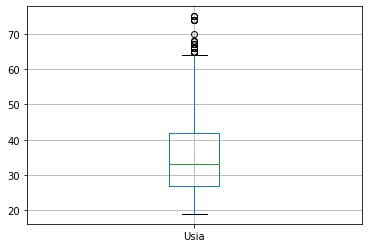

In [202]:
# 2.3.2.5.3 Mengidentifikasi outlier dan validitas data

df.boxplot(column=['Usia'])

In [203]:
# Latihan untuk boxplot variabel SLIK_Cicilan_Bulanan, SLIK_Outstanding_CC, Lama_Cicilan, dan Jumlah_Pinjaman
# Tulis kode disini



In [204]:
# 2.3.2.5.4.1 Imputasi baris data yang kosong dengan asumsi nilai

# Koding berikut menggantikan missing value dari semua variabel dengan
# nilai yang paling sering muncul (modus) untuk variabel kategori dan nilai rata-rata untuk variabel numerik

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

for kolom in df_numerik.columns:
  df_numerik[kolom].fillna(df_numerik[kolom].mean(), inplace=True)

for kolom in df_kategori.columns:
  df_kategori[kolom].fillna(df_kategori[kolom].mode()[0], inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_1 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [205]:
# 2.3.2.5.4.2 Tidak menggunakan baris data yang kosong (Drop Data)

# Menggunakan fungsi dropna() untuk menghapus semua baris yang memiliki data kosong
df_pembersihan_2 = df.dropna()

In [206]:
# 2.3.2.5.4.3 Tidak menggunakan kolom data yang kosong (Drop Variable)

# Menggunakan fungsi dropna() untuk menghapus kolom yang memiliki data kosong
df_pembersihan_3 = df.dropna(axis='columns')

In [207]:
# 2.3.2.5.4.4 Kategorikan data yang kosong (Flag)

# Koding berikut memberikan tanda flagging untuk baris data yang berisikan baris data kosong

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

for kolom in df_numerik.columns:
  # Membuat kolom baru untuk baris data yang kosong
  df_numerik[kolom+"_missing"] = df_numerik[kolom].isnull()
  df_numerik[kolom].fillna(0, inplace=True)

for kolom in df_kategori.columns:
  # Kolom kategori harus secara eksplisit menambahkan data kategori baru
  df_kategori[kolom] = df_kategori[kolom].cat.add_categories("00_Data_Kosong")
  df_kategori[kolom].fillna("00_Data_Kosong", inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_4 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [208]:
# Melanjutkan proses dengan asumsi bahwa baris data yang kosong tidak signifikan dan tidak akan terjadi baris data kosong lagi.
df_clean = df_pembersihan_2

In [209]:
# Menghapus indeks dari data yang telah dibuang
df_clean = df_clean.reset_index(drop=True)

In [210]:
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_clean.to_csv('df_clean.csv') 
files.download('df_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [211]:
df_clean.info()

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_clean.to_csv('df_clean.csv') 
files.download('df_clean.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              948 non-null    category
 1   gagal_bayar                     948 non-null    category
 2   Lama_Cicilan                    948 non-null    float64 
 3   Tujuan_Pinjaman                 948 non-null    category
 4   Jumlah_Pinjaman                 948 non-null    float64 
 5   Pekerjaan                       948 non-null    category
 6   Pendapatan_perbulan             948 non-null    category
 7   Lama_Bekerja                    948 non-null    category
 8   Status                          948 non-null    category
 9   Kepemilikan_Rumah               948 non-null    category
 10  Alamat_Rumah                    948 non-null    category
 11  Alamat_Kantor                   948 non-null    category
 12  Usia                  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [212]:
# 2.3.2.5.5.1 EDA Analisa dasar variabel untuk gagal_bayar

# Untuk melihat frekuensi dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts(normalize=True) * 100)

0_Bayar    670
1_Gagal    278
Name: gagal_bayar, dtype: int64
0_Bayar    70.675105
1_Gagal    29.324895
Name: gagal_bayar, dtype: float64


In [213]:
# 2.3.2.5.5.2 Exploratory Data Analysis untuk SLIK_Kolektabilitas

# Untuk melihat frekuensi dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts(normalize=True) * 100)

Kolek 3            483
Kolek 1            270
Kolek 2             84
Tidak_Ditemukan     49
Kolek 5             48
Kolek 4             14
Name: SLIK_Kolektibilitas, dtype: int64
Kolek 3            50.949367
Kolek 1            28.481013
Kolek 2             8.860759
Tidak_Ditemukan     5.168776
Kolek 5             5.063291
Kolek 4             1.476793
Name: SLIK_Kolektibilitas, dtype: float64


In [214]:
# Berapa banyak yang gagal bayar dari masing-masing nilai SLIK Kolektabilitas
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']))

# dalam proporsi persentase
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'],df_clean['gagal_bayar'],normalize='index',)*100)

gagal_bayar          0_Bayar  1_Gagal
SLIK_Kolektibilitas                  
Kolek 1                  229       41
Kolek 2                   58       26
Kolek 3                  333      150
Kolek 4                    6        8
Kolek 5                   21       27
Tidak_Ditemukan           23       26
gagal_bayar            0_Bayar    1_Gagal
SLIK_Kolektibilitas                      
Kolek 1              84.814815  15.185185
Kolek 2              69.047619  30.952381
Kolek 3              68.944099  31.055901
Kolek 4              42.857143  57.142857
Kolek 5              43.750000  56.250000
Tidak_Ditemukan      46.938776  53.061224


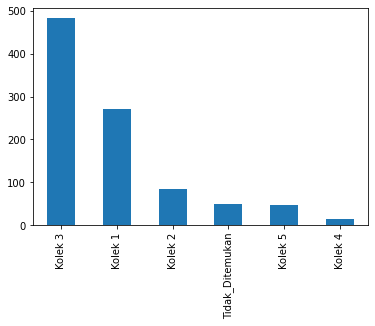

In [215]:
# 2.3.2.5.5.2 SLIK_Kolektibilitas Data Visualisasi

# Fungsi value_counts().plot(kind='bar')
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='bar')

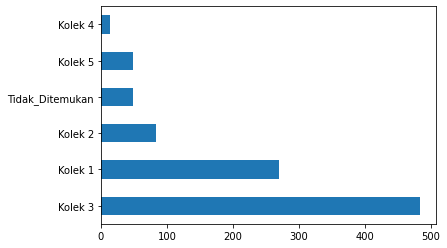

In [216]:
# Menampilkan plot bar secara horizontal
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='barh')

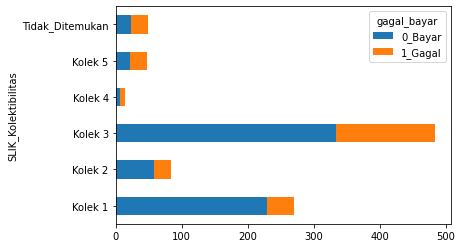

In [217]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']).plot(kind='barh', stacked=True)

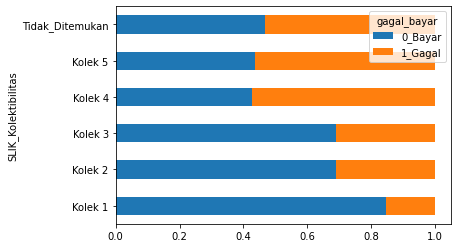

In [218]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar, secara proporsi
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar'], normalize='index').plot(kind='barh', stacked=True)

In [219]:
# Latihan EDA untuk Tujuan_Pinjaman, Lama_Bekerja, atau variabel kategori / teks lainnya
# Tulis kode disini



In [220]:
# 2.3.2.5.5.3 Exploratory Data Analysis untuk Usia

# Rangkuman statistik untuk variabel numerik Usia
print(df_clean['Usia'].describe())

# Rangkuman statistik untuk variabel numerik Usia, berdasarkan default (gagal bayar atau tidak)
df_clean.groupby('gagal_bayar')['Usia'].describe()

count    948.000000
mean      35.548523
std       11.335750
min       19.000000
25%       27.000000
50%       33.000000
75%       42.000000
max       75.000000
Name: Usia, dtype: float64


,count,mean,std,min,25%,50%,75%,max
gagal_bayar,,,,,,,,
0_Bayar,670.0,36.116418,11.239140,19.0,27.0,34.0,42.00,75.0
1_Gagal,278.0,34.179856,11.470415,19.0,25.0,31.0,40.75,74.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

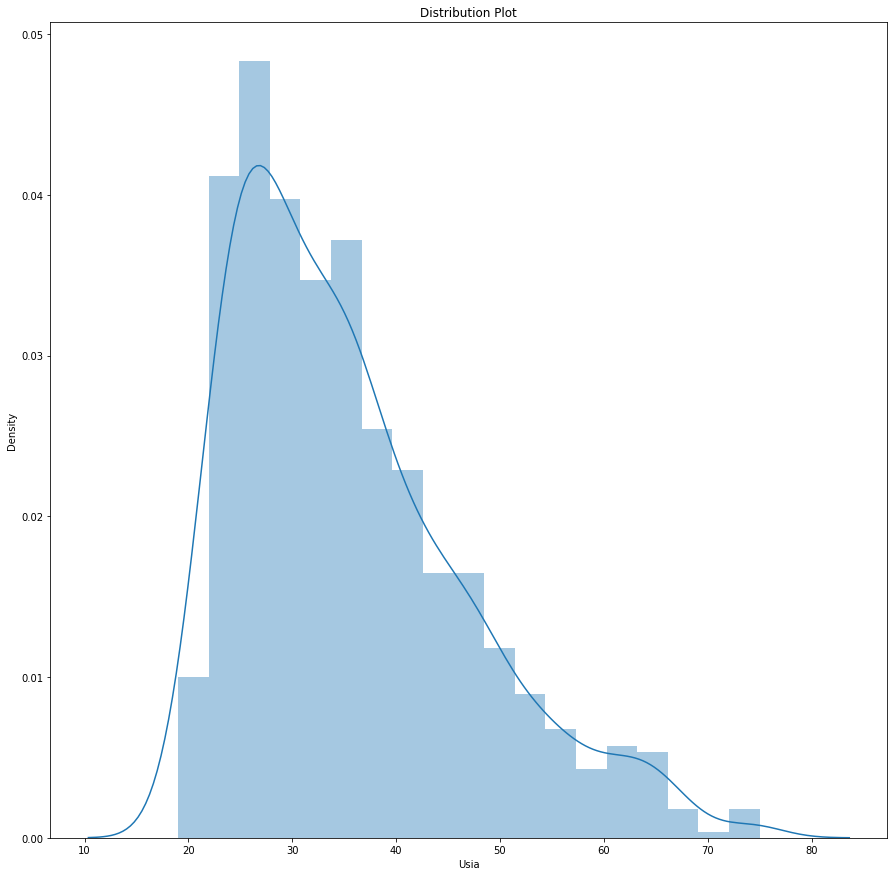

In [221]:
# Fungsi distplot() dari library seaborn
# Perhatikan bahwa distribusi plot harus tidak memiliki data kosong / missing value.
# Oleh karena itu harus menambahkan fungsi dropna() untuk secara sementara tidak
# mengikutsertakan missing value dalam pembuatan plot distribusi

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
sns.distplot(df_clean['Usia'].dropna(), ax=ax).set_title('Distribution Plot')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


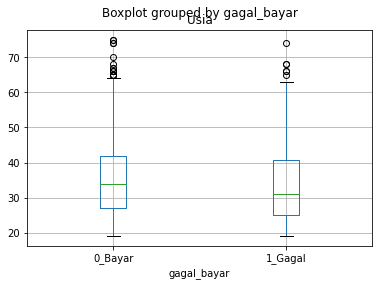

In [222]:
# Menambahkan by di fungsi boxplot untuk membagi boxplot berdasarkan gagal_bayar
df_clean.boxplot(by='gagal_bayar',column=['Usia'])

In [223]:
# Latihan untuk rangkuman analisa dan visualisasi untuk variabel SLIK_Cicilan_Bulanan, SLIK_Outstanding_CC, Lama_Cicilan, dan Jumlah_Pinjaman
# Tulis kode disini



In [224]:
import numpy as np

# Untuk dapat melakukan analisa statistik, harus mengubah variabel gagal_bayar dari string menjadi angka (integer)
# Mengubah target variabel gagal_bayar menjadi angka 0 dan 1
conditions = [
             df_clean['gagal_bayar'] == '1_Gagal', 
             df_clean['gagal_bayar'] == '0_Bayar'
             ]

choices     = [
             1,
             0
             ]
df_clean['default'] = np.select(conditions,choices, default = 0)

In [225]:
# Menghitung korelasi antara variabel Usia dengan default
print(df_clean['default'].corr(df_clean['Usia']))

-0.0778147171989035


In [226]:
from scipy import stats

# Uji coba hipotesis apakah ada perbedaan nilai rata-rata variabel 
# API_CreditScore_Vendor_A dengan default (gagal bayar dan tidak gagal bayar)
stats.ttest_ind( df_clean[df_clean.default == 0].Usia,
             	df_clean[df_clean.default == 1].Usia, nan_policy='omit')

Ttest_indResult(statistic=2.400635164816287, pvalue=0.016558910387081596)

In [227]:
# 2.3.2.5.6 Memahami korelasi antar variabel dan dengan target

# Korelasi Antar semua Variabel numerik
import seaborn as sns
corr = df_clean.corr()
corr

,Lama_Cicilan,Jumlah_Pinjaman,Usia,SLIK_Cicilan_Bulanan,SLIK_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Apps_Installed,default
Lama_Cicilan,1.000000,0.298788,0.029419,0.000481,0.029004,-0.012322,-0.028463,-0.057698,0.021000
Jumlah_Pinjaman,0.298788,1.000000,0.041210,-0.031538,-0.007841,0.013080,-0.020965,-0.026660,0.132585
Usia,0.029419,0.041210,1.000000,0.007345,-0.008791,0.018705,0.018308,0.032119,-0.077815
SLIK_Cicilan_Bulanan,0.000481,-0.031538,0.007345,1.000000,0.317872,0.034330,-0.056521,-0.003362,0.181373
SLIK_Outstanding_CC,0.029004,-0.007841,-0.008791,0.317872,1.000000,-0.035197,-0.004624,-0.054377,0.185339
API_CreditScore_Vendor_A,-0.012322,0.013080,0.018705,0.034330,-0.035197,1.000000,-0.000716,0.040767,-0.038087
API_CreditScore_Vendor_B,-0.028463,-0.020965,0.018308,-0.056521,-0.004624,-0.000716,1.000000,-0.018533,-0.160338
Device_Apps_Installed,-0.057698,-0.026660,0.032119,-0.003362,-0.054377,0.040767,-0.018533,1.000000,-0.132190
default,0.021000,0.132585,-0.077815,0.181373,0.185339,-0.038087,-0.160338,-0.132190,1.000000


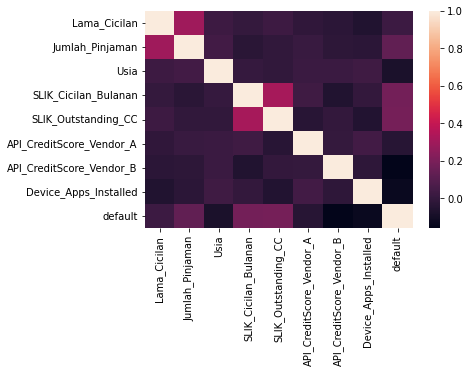

In [228]:
# Korelasi secara visualisasi
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [229]:
# Latihan untuk korelasi untuk variabel API_CreditScore_Vendor_A dan Lama_Cicilan
# Tulis kode disini
# Kesimpulan yang didapatkan?


In [230]:
# Latihan uji coba hipotesis untuk API_CreditScore_Vendor_A dan Lama_Cicilan
# Tulis kode disini
# Kesimpulan yang didapatkan?



In [231]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              948 non-null    category
 1   gagal_bayar                     948 non-null    category
 2   Lama_Cicilan                    948 non-null    float64 
 3   Tujuan_Pinjaman                 948 non-null    category
 4   Jumlah_Pinjaman                 948 non-null    float64 
 5   Pekerjaan                       948 non-null    category
 6   Pendapatan_perbulan             948 non-null    category
 7   Lama_Bekerja                    948 non-null    category
 8   Status                          948 non-null    category
 9   Kepemilikan_Rumah               948 non-null    category
 10  Alamat_Rumah                    948 non-null    category
 11  Alamat_Kantor                   948 non-null    category
 12  Usia                  

In [232]:
# 2.3.2.5.6.2 Memahami korelasi antar variabel independent kategori

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df_clean.select_dtypes(include=['float64','int64','int'])
df_kategori = df_clean.select_dtypes(exclude = ['float64','int64','int'])

# Menghapus kolom yang tidak berkaitan dengan korelasi antar variabel independent
df_kategori.drop(columns=['ID', 'gagal_bayar'], inplace=True)

from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.get_dummies(data = df_kategori)

# Kode Python berdasarkan referensi dari https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df.to_csv('chi_square.csv') 
files.download('chi_square.csv')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                                            Tujuan_Pinjaman_buka_bisnis  ...  Email_Domain_Type_Public_Domain
Tujuan_Pinjaman_buka_bisnis                                0.000000e+00  ...                     4.236873e-04
Tujuan_Pinjaman_elektronik                                 3.736414e-22  ...                     8.344980e-04
Tujuan_Pinjaman_liburan                                    1.432841e-05  ...                     7.020366e-02
Tujuan_Pinjaman_makanan                                    1.027722e-06  ...                     2.353050e-01
Tujuan_Pinjaman_pendidikan                                 3.761034e-05  ...                     3.820163e-01
...                                                                 ...  ...                              ...
Mobile_Number_Active_Since_3_1_ke_2_tahun                  5.577441e-01  ...                     1.663092e-01
Mobile_Number_Active_Since_4_2_ke_5_tahun                  1.438647e-01  ...                     2.431699e-01
Mobile_Num

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [233]:
# Menghindari multikolinearitas antara Lama_Cicilan dan Jumlah_Pinjaman
df_clean.drop(columns=['Jumlah_Pinjaman'], inplace=True)

/usr/local/lib/python3.7/dist-packages/scorecardpy/condition_fun.py:19: UserWarning: There are 2 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: Device_Apps_Installed_Bin, Device_Apps_Installed_WOE)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))


[INFO] creating woe binning ...
>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
ID
>>> Continue the binning process?
1: yes 
2: no
Selection: 1
Binning on 948 rows and 49 columns in 00:01:08


/usr/local/lib/python3.7/dist-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/usr/local/lib/python3.7/dist-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/usr/local/lib/python3.7/dist-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To co

{'API_CreditScore_Vendor_A': <Figure size 432x288 with 2 Axes>,
 'API_CreditScore_Vendor_A_Bin': <Figure size 432x288 with 2 Axes>,
 'API_CreditScore_Vendor_B': <Figure size 432x288 with 2 Axes>,
 'API_CreditScore_Vendor_B_Bin': <Figure size 432x288 with 2 Axes>,
 'API_CreditScore_Vendor_B_WOE': <Figure size 432x288 with 2 Axes>,
 'Alamat_Kantor': <Figure size 432x288 with 2 Axes>,
 'Alamat_Rumah': <Figure size 432x288 with 2 Axes>,
 'Alamat_Rumah_Kantor': <Figure size 432x288 with 2 Axes>,
 'DBR': <Figure size 432x288 with 2 Axes>,
 'DBR_Bin': <Figure size 432x288 with 2 Axes>,
 'DBR_WOE': <Figure size 432x288 with 2 Axes>,
 'Device_Active_Since': <Figure size 432x288 with 2 Axes>,
 'Device_Active_Since_Bin': <Figure size 432x288 with 2 Axes>,
 'Device_Active_Since_WOE': <Figure size 432x288 with 2 Axes>,
 'Device_Apps_Installed': <Figure size 432x288 with 2 Axes>,
 'Device_Apps_Segmentation': <Figure size 432x288 with 2 Axes>,
 'Device_Apps_Segmentation_Bin': <Figure size 432x288 wit

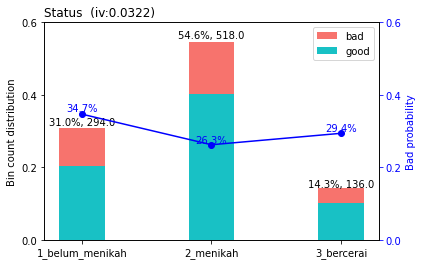

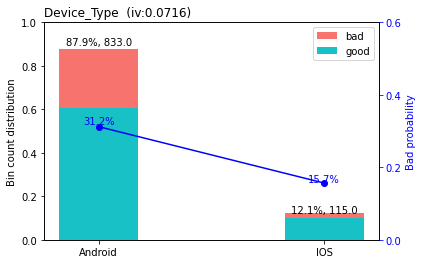

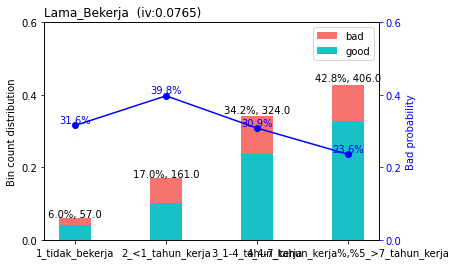

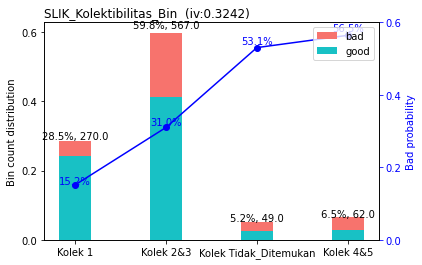

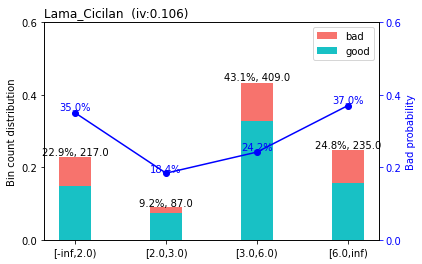

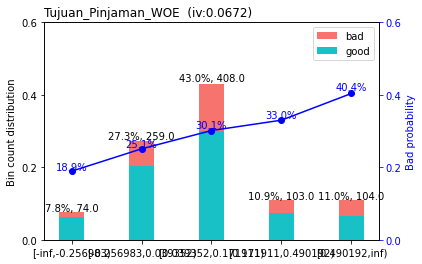

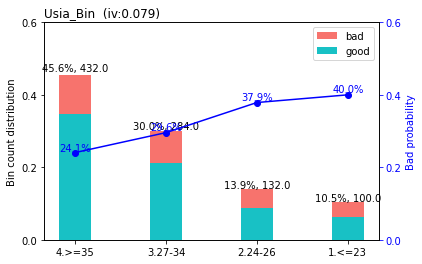

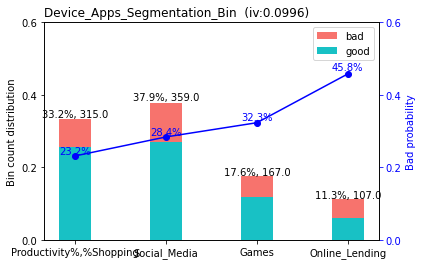

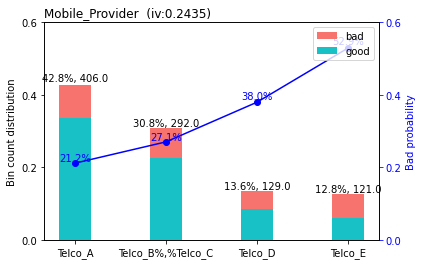

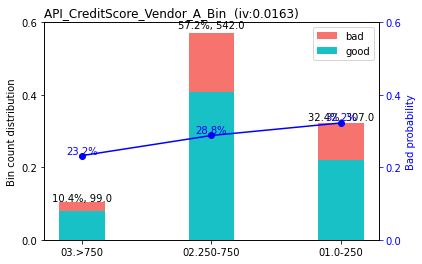

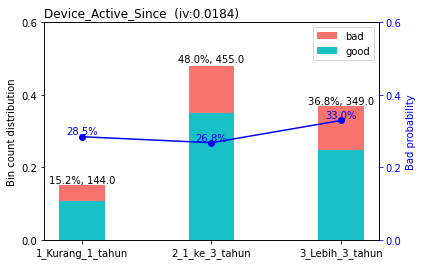

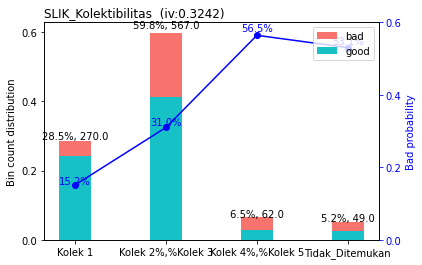

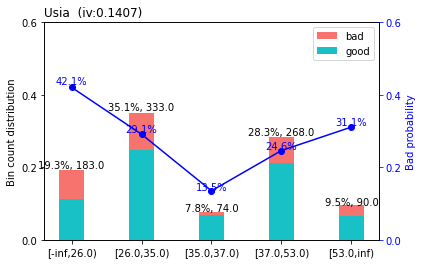

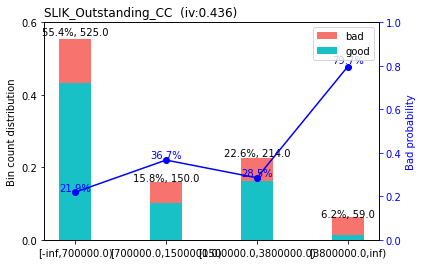

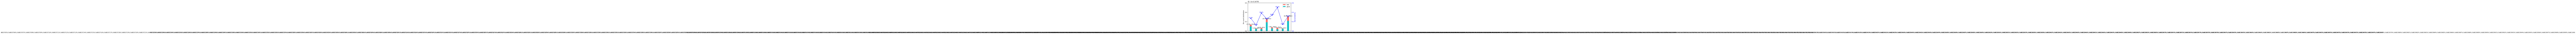

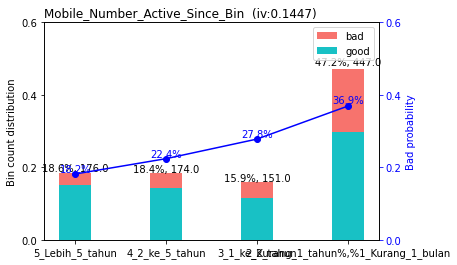

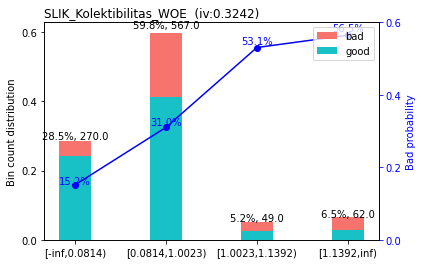

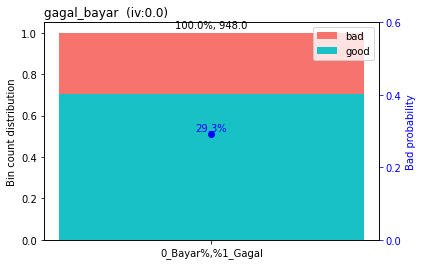

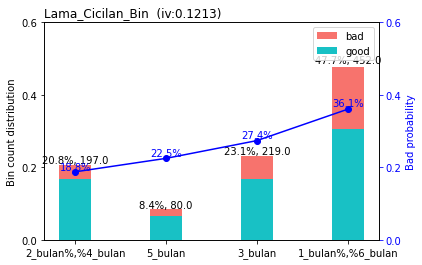

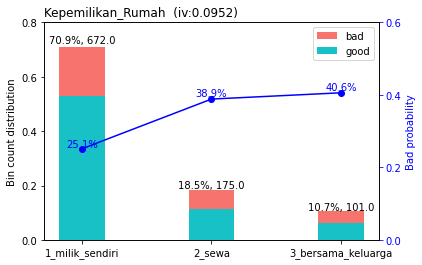

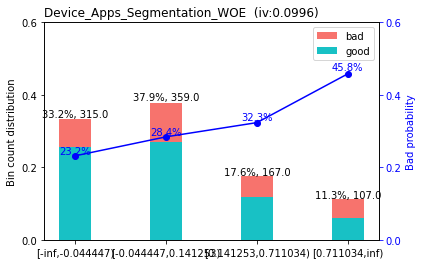

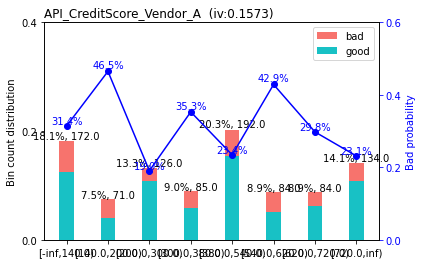

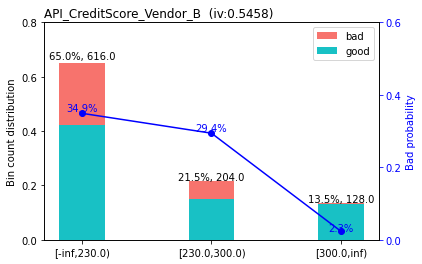

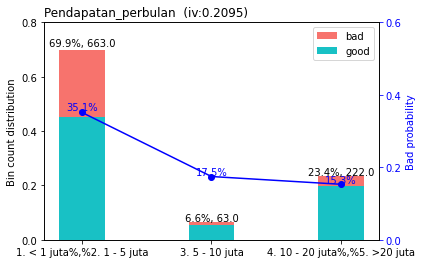

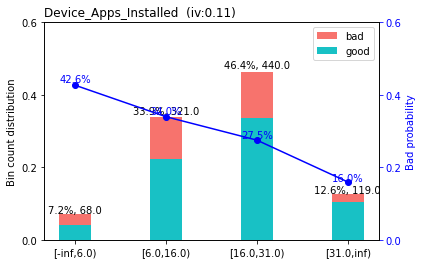

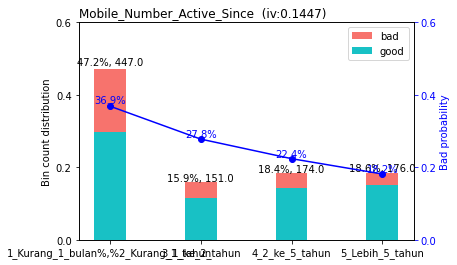

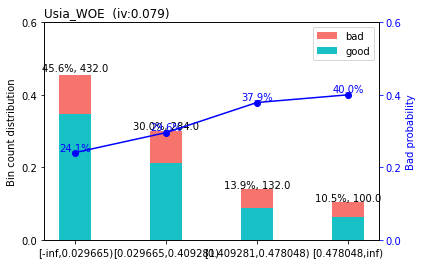

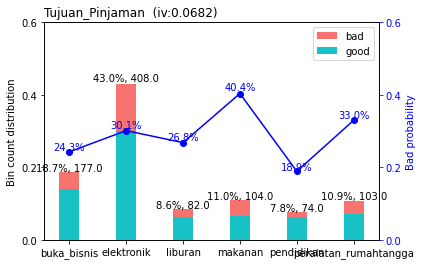

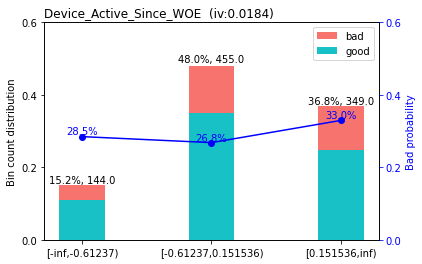

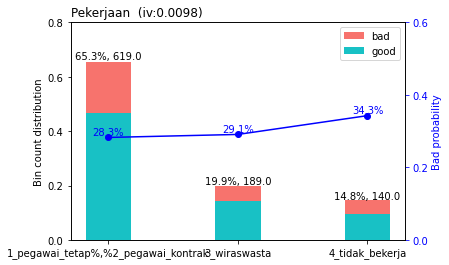

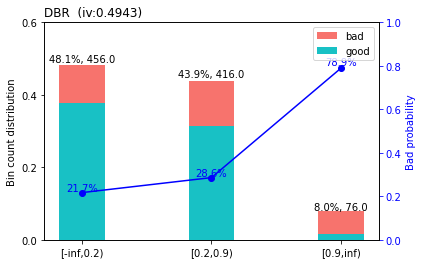

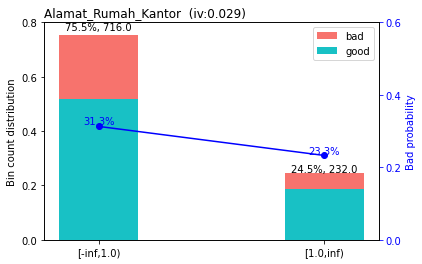

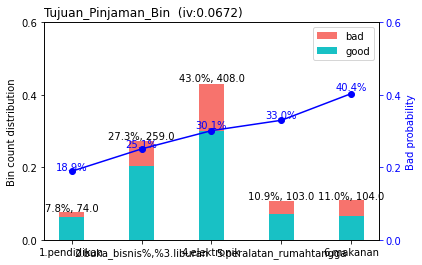

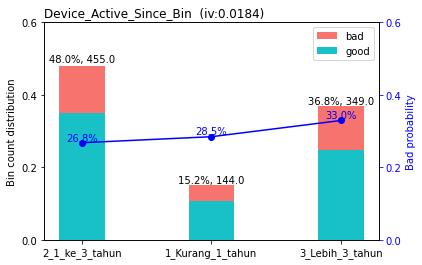

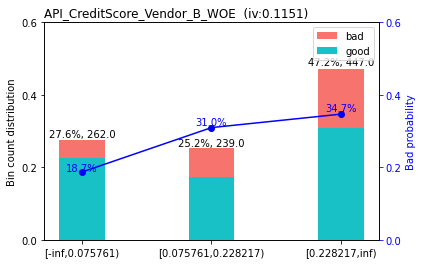

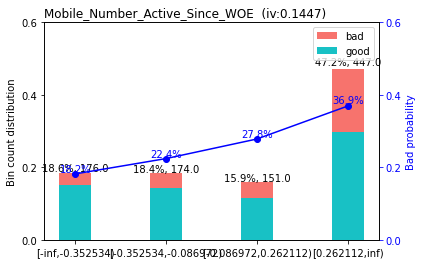

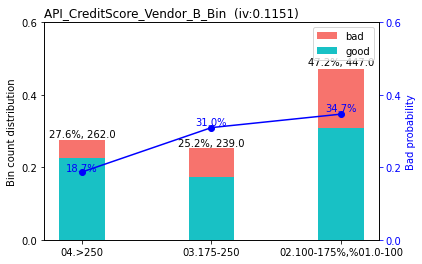

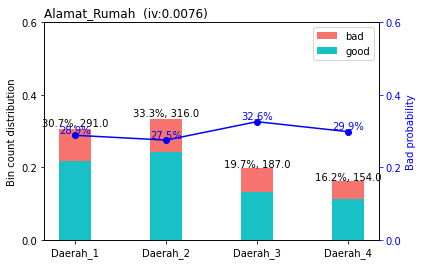

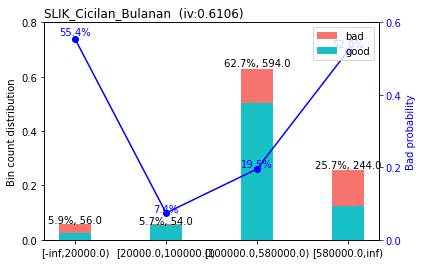

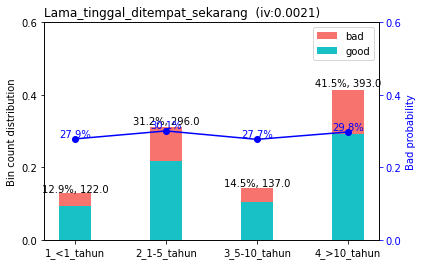

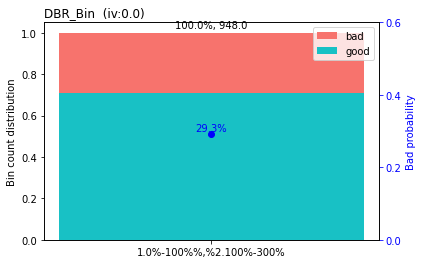

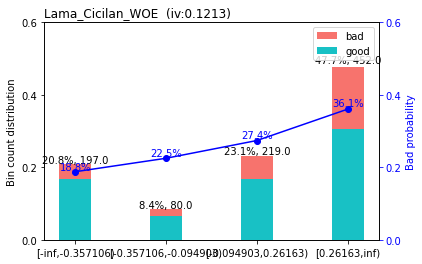

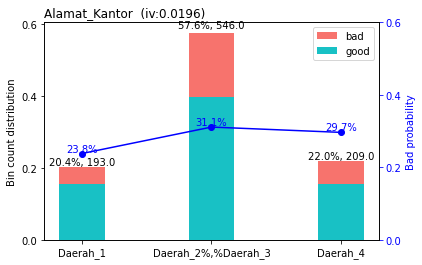

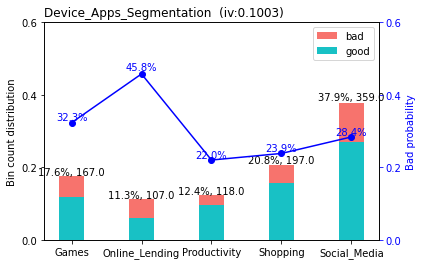

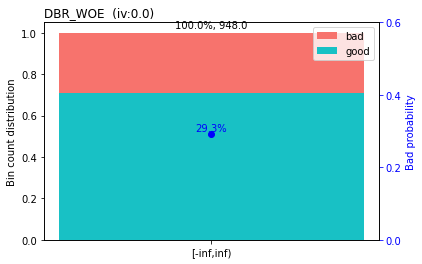

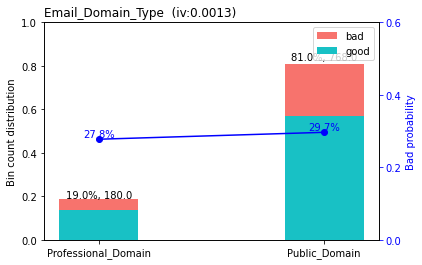

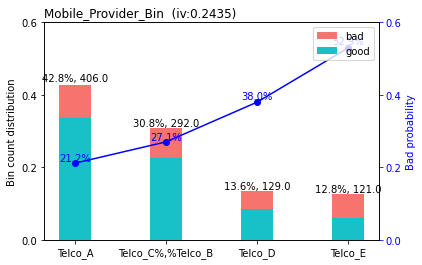

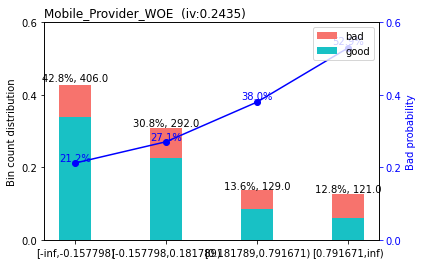

In [266]:
# test
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_clean, y = 'default')
scpy.woebin_plot(bins)

In [234]:
# 2.3.2.5.7.3 Penggunaan WOE dan IV dalam Scorecard
# Reference https://stackoverflow.com/questions/60892714/how-to-get-the-weight-of-evidence-woe-and-information-value-iv-in-python-pan

df_woe_iv = (pd.crosstab(df_clean['SLIK_Kolektibilitas'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

default                     0         1       woe        iv
SLIK_Kolektibilitas                                        
Kolek 1              0.341791  0.147482 -0.840493  0.324213
Kolek 2              0.086567  0.093525  0.077310  0.324213
Kolek 3              0.497015  0.539568  0.082149  0.324213
Kolek 4              0.008955  0.028777  1.167339  0.324213
Kolek 5              0.031343  0.097122  1.130971  0.324213
Tidak_Ditemukan      0.034328  0.093525  1.002259  0.324213


In [235]:
# Variabel SLIK_Kolektibilitas

conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 1' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 2' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 3' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 4' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 5' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Tidak_Ditemukan' )
             ]

choices = [
          'Kolek 1',
          'Kolek 2&3',
          'Kolek 4&5',
          'Kolek Tidak_Ditemukan'
          ]

df_clean['SLIK_Kolektibilitas_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(df_clean['SLIK_Kolektibilitas_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['SLIK_Kolektibilitas_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 1' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 2' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 3' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 4' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 5' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Tidak_Ditemukan' )
             ]

choices = [
          -0.8405,
          0.0814,
          1.1392,
          1.0023
          ]

df_clean['SLIK_Kolektibilitas_WOE'] = np.select(conditions, choices)

Kolek 2&3                59.810127
Kolek 1                  28.481013
Kolek 4&5                 6.540084
Kolek Tidak_Ditemukan     5.168776
Name: SLIK_Kolektibilitas_Bin, dtype: float64
default                         0         1       woe        iv
SLIK_Kolektibilitas_Bin                                        
Kolek 1                  0.341791  0.147482 -0.840493  0.324191
Kolek 2&3                0.583582  0.633094  0.081433  0.324191
Kolek 4&5                0.040299  0.125899  1.139168  0.324191
Kolek Tidak_Ditemukan    0.034328  0.093525  1.002259  0.324191


In [278]:
# Variabel Usia

conditions = [
             ( df_clean['Usia'] <= 25 ),
             ( df_clean['Usia'] >= 26 ) & ( df_clean['Usia'] <= 30),
             ( df_clean['Usia'] >= 31 ) & ( df_clean['Usia'] <= 35 ),
             ( df_clean['Usia'] >= 36 ) & ( df_clean['Usia'] <= 40 ),
             ( df_clean['Usia'] >= 41 ) & ( df_clean['Usia'] <= 50 ),
             ( df_clean['Usia'] >= 51 )
             ]

choices = [
          '1.<=25',
          '2.26-30',
          '3.31-35',
          '4.36-40',
          '5.41-50',
          '6.>=51'
          ]
df_clean['Usia_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(df_clean['Usia_Bin'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Usia_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Usia_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Usia'] <= 25 ),
             ( df_clean['Usia'] >= 26 ) & ( df_clean['Usia'] <= 30),
             ( df_clean['Usia'] >= 31 ) & ( df_clean['Usia'] <= 35 ),
             ( df_clean['Usia'] >= 36 ) & ( df_clean['Usia'] <= 40 ),
             ( df_clean['Usia'] >= 41 ) & ( df_clean['Usia'] <= 50 ),
             ( df_clean['Usia'] >= 51 )
             ]

choices = [
          0.560023,
          -0.009605,
          -0.227053,
          -0.344119,
          -0.185054,
          -0.049879
          ]
df_clean['Usia_WOE'] = np.select(conditions, choices)

2.26-30    21.729958
1.<=25     19.303797
3.31-35    17.405063
5.41-50    16.455696
4.36-40    13.924051
6.>=51     11.181435
Name: Usia_Bin, dtype: float64
default     0   1
Usia_Bin         
1.<=25    106  77
2.26-30   146  60
3.31-35   124  41
4.36-40   102  30
5.41-50   116  40
6.>=51     76  30
default          0         1       woe       iv
Usia_Bin                                       
1.<=25    0.158209  0.276978  0.560023  0.09601
2.26-30   0.217910  0.215827 -0.009605  0.09601
3.31-35   0.185075  0.147482 -0.227053  0.09601
4.36-40   0.152239  0.107914 -0.344119  0.09601
5.41-50   0.173134  0.143885 -0.185054  0.09601
6.>=51    0.113433  0.107914 -0.049879  0.09601


In [261]:
# Variabel Tujuan_Pinjaman

# Untuk melihat proporsi (dalam persentase) dari variabel Tujuan_Pinjaman
print(df_clean['Tujuan_Pinjaman'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Tujuan_Pinjaman'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( (df_clean['Tujuan_Pinjaman'] == 'pendidikan') ), 
             ( df_clean['Tujuan_Pinjaman'] == 'buka_bisnis' ),
             ( (df_clean['Tujuan_Pinjaman'] == 'liburan') ),
             ( (df_clean['Tujuan_Pinjaman'] == 'elektronik')   ), 
             ( df_clean['Tujuan_Pinjaman'] == 'peralatan_rumahtangga' ),
             ( df_clean['Tujuan_Pinjaman'] == 'makanan' )
             ]

choices = [
          '1.pendidikan',
          '2.buka_bisnis',
          '3.liburan',
          '4.elektronik',
          '5.peralatan_rumahtangga',
          '6.makanan'
          ]
df_clean['Tujuan_Pinjaman_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Tujuan_Pinjaman_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Tujuan_Pinjaman_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( (df_clean['Tujuan_Pinjaman'] == 'pendidikan') ), 
             ( df_clean['Tujuan_Pinjaman'] == 'buka_bisnis' ),
             ( (df_clean['Tujuan_Pinjaman'] == 'liburan') ),
             ( (df_clean['Tujuan_Pinjaman'] == 'elektronik')   ), 
             ( df_clean['Tujuan_Pinjaman'] == 'peralatan_rumahtangga' ),
             ( df_clean['Tujuan_Pinjaman'] == 'makanan' )
             ]

choices = [
          -0.575631,
          -0.256983,
          -0.123646,
          0.039352,
          0.171911,
          0.490192
          ]
df_clean['Tujuan_Pinjaman_WOE'] = np.select(conditions, choices)


elektronik               43.037975
buka_bisnis              18.670886
makanan                  10.970464
peralatan_rumahtangga    10.864979
liburan                   8.649789
pendidikan                7.805907
Name: Tujuan_Pinjaman, dtype: float64
default                       0         1       woe        iv
Tujuan_Pinjaman                                              
buka_bisnis            0.200000  0.154676 -0.256983  0.068185
elektronik             0.425373  0.442446  0.039352  0.068185
liburan                0.089552  0.079137 -0.123646  0.068185
makanan                0.092537  0.151079  0.490192  0.068185
pendidikan             0.089552  0.050360 -0.575631  0.068185
peralatan_rumahtangga  0.102985  0.122302  0.171911  0.068185
default                    0    1
Tujuan_Pinjaman_Bin              
1.pendidikan              60   14
2.buka_bisnis            134   43
3.liburan                 60   22
4.elektronik             285  123
5.peralatan_rumahtangga   69   34
6.makanan         

In [263]:
# Variabel Lama_Cicilan

# Untuk melihat proporsi (dalam persentase) dari variabel Lama_Cicilan
print(df_clean['Lama_Cicilan'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Lama_Cicilan'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Lama_Cicilan'] == 1 ), 
             ( df_clean['Lama_Cicilan'] == 2 ), 
             ( df_clean['Lama_Cicilan'] == 3 ), 
             ( df_clean['Lama_Cicilan'] == 4 ), 
             ( df_clean['Lama_Cicilan'] == 5 ), 
             ( df_clean['Lama_Cicilan'] == 6 )
             ]

choices = [
          '1_bulan',
          '2_bulan',
          '3_bulan',
          '4_bulan',
          '5_bulan',
          '6_bulan'
          ]
df_clean['Lama_Cicilan_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Lama_Cicilan_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Lama_Cicilan_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['Lama_Cicilan'] == 1 ), 
             ( df_clean['Lama_Cicilan'] == 2 ), 
             ( df_clean['Lama_Cicilan'] == 3 ), 
             ( df_clean['Lama_Cicilan'] == 4 ), 
             ( df_clean['Lama_Cicilan'] == 5 ), 
             ( df_clean['Lama_Cicilan'] == 6 )
             ]

choices = [
          0.261630,
          -0.610435,
          -0.094903,
          -0.564457,
          -0.357106,
          0.348352
          ]
df_clean['Lama_Cicilan_WOE'] = np.select(conditions, choices)

6.0    24.789030
3.0    23.101266
1.0    22.890295
4.0    11.603376
2.0     9.177215
5.0     8.438819
Name: Lama_Cicilan, dtype: float64
default              0         1       woe        iv
Lama_Cicilan                                        
1.0           0.210448  0.273381  0.261630  0.122392
2.0           0.105970  0.057554 -0.610435  0.122392
3.0           0.237313  0.215827 -0.094903  0.122392
4.0           0.132836  0.075540 -0.564457  0.122392
5.0           0.092537  0.064748 -0.357106  0.122392
6.0           0.220896  0.312950  0.348352  0.122392
default             0   1
Lama_Cicilan_Bin         
1_bulan           141  76
2_bulan            71  16
3_bulan           159  60
4_bulan            89  21
5_bulan            62  18
6_bulan           148  87
default                  0         1       woe        iv
Lama_Cicilan_Bin                                        
1_bulan           0.210448  0.273381  0.261630  0.122392
2_bulan           0.105970  0.057554 -0.610435  0.122392
3_b

In [265]:
# Variabel Device_Apps_Segmentation

# Untuk melihat proporsi (dalam persentase) dari variabel Device_Apps_Segmentation
print(df_clean['Device_Apps_Segmentation'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Device_Apps_Segmentation'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Device_Apps_Segmentation'] == 'Productivity' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Social_Media' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Shopping' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Games' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Online_Lending' )
             ]

choices = [
          'Productivity',
          'Social_Media',
          'Shopping',
          'Games',
          'Online_Lending'
          ]
df_clean['Device_Apps_Segmentation_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Device_Apps_Segmentation_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Device_Apps_Segmentation_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['Device_Apps_Segmentation'] == 'Productivity' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Social_Media' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Shopping' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Games' ), 
             ( df_clean['Device_Apps_Segmentation'] == 'Online_Lending' )
             ]

choices = [
          -0.384035,
          -0.044447,
          -0.280831,
          0.141253,
          0.711034
          ]
df_clean['Device_Apps_Segmentation_WOE'] = np.select(conditions, choices)

Social_Media      37.869198
Shopping          20.780591
Games             17.616034
Productivity      12.447257
Online_Lending    11.286920
Name: Device_Apps_Segmentation, dtype: float64
default                          0         1       woe       iv
Device_Apps_Segmentation                                       
Games                     0.168657  0.194245  0.141253  0.10034
Online_Lending            0.086567  0.176259  0.711034  0.10034
Productivity              0.137313  0.093525 -0.384035  0.10034
Shopping                  0.223881  0.169065 -0.280831  0.10034
Social_Media              0.383582  0.366906 -0.044447  0.10034
default                         0    1
Device_Apps_Segmentation_Bin          
Games                         113   54
Online_Lending                 58   49
Productivity                   92   26
Shopping                      150   47
Social_Media                  257  102
default                              0         1       woe       iv
Device_Apps_Segmentation

In [279]:
# Variabel API_CreditScore_Vendor_A
# Not using vendor A


conditions = [
             ( df_clean['API_CreditScore_Vendor_A'] <= 250 ), 
             ( df_clean['API_CreditScore_Vendor_A'] <= 750 ),
             ( df_clean['API_CreditScore_Vendor_A'] > 750 )
             ]

choices = [
          '01.0-250',
          '02.250-750',
          '03.>750'
          ]
df_clean['API_CreditScore_Vendor_A_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['API_CreditScore_Vendor_A_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['API_CreditScore_Vendor_A_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['API_CreditScore_Vendor_A_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['API_CreditScore_Vendor_A'] <= 250 ), 
             ( df_clean['API_CreditScore_Vendor_A'] <= 750 ),
             ( df_clean['API_CreditScore_Vendor_A'] > 750 )
             ]

choices = [
          0.137238,
          -0.026325,
          -0.315583
          ]
df_clean['API_CreditScore_Vendor_A_WOE'] = np.select(conditions, choices)

default                         0    1
API_CreditScore_Vendor_A_Bin          
01.0-250                      208   99
02.250-750                    386  156
03.>750                        76   23
02.250-750    57.172996
01.0-250      32.383966
03.>750       10.443038
Name: API_CreditScore_Vendor_A_Bin, dtype: float64
default                              0         1       woe        iv
API_CreditScore_Vendor_A_Bin                                        
01.0-250                      0.310448  0.356115  0.137238  0.016349
02.250-750                    0.576119  0.561151 -0.026325  0.016349
03.>750                       0.113433  0.082734 -0.315583  0.016349


In [282]:
# Variabel API_CreditScore_Vendor_B

conditions = [
             ( df_clean['API_CreditScore_Vendor_B'] <= 100 ), 
             ( df_clean['API_CreditScore_Vendor_B'] <= 175 ),
             ( df_clean['API_CreditScore_Vendor_B'] <= 250 ),
             ( df_clean['API_CreditScore_Vendor_B'] > 250 )
             ]

choices = [
          '01.0-100',
          '02.100-175',
          '03.175-250',
          '04.>250'
          ]
df_clean['API_CreditScore_Vendor_B_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['API_CreditScore_Vendor_B_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['API_CreditScore_Vendor_B_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['API_CreditScore_Vendor_B_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['API_CreditScore_Vendor_B'] <= 100 ), 
             ( df_clean['API_CreditScore_Vendor_B'] <= 175 ),
             ( df_clean['API_CreditScore_Vendor_B'] <= 250 ),
             ( df_clean['API_CreditScore_Vendor_B'] > 250 )
             ]

choices = [
          0.290050,
          0.218945,
          0.077776,
          -0.589815
          ]
df_clean['API_CreditScore_Vendor_B_WOE'] = np.select(conditions, choices)

default                         0   1
API_CreditScore_Vendor_B_Bin         
01.0-100                      110  61
02.100-175                    182  94
03.175-250                    165  74
04.>250                       213  49
02.100-175    29.113924
04.>250       27.637131
03.175-250    25.210970
01.0-100      18.037975
Name: API_CreditScore_Vendor_B_Bin, dtype: float64
default                              0         1       woe        iv
API_CreditScore_Vendor_B_Bin                                        
01.0-100                      0.164179  0.219424  0.290050  0.115678
02.100-175                    0.271642  0.338129  0.218945  0.115678
03.175-250                    0.246269  0.266187  0.077776  0.115678
04.>250                       0.317910  0.176259 -0.589815  0.115678


In [243]:
# Variabel Mobile_Provider

# Untuk melihat proporsi (dalam persentase) dari variabel Device_Apps_Segmentation
print(df_clean['Mobile_Provider'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Mobile_Provider'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Mobile_Provider'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Mobile_Provider'] == 'Telco_A' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_B' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_C' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_D' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_E' )
             ]

choices = [
          'Telco_A',
          'Telco_B',
          'Telco_C',
          'Telco_D',
          'Telco_E'
          ]
df_clean['Mobile_Provider_Bin'] = np.select(conditions, choices)


conditions = [
             ( df_clean['Mobile_Provider'] == 'Telco_A' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_B' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_C' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_D' ), 
             ( df_clean['Mobile_Provider'] == 'Telco_E' )
             ]

choices = [
          -0.832344,
          -0.157798,
          -0.021750,
          0.181789,
          0.791671
          ]
df_clean['Mobile_Provider_WOE'] = np.select(conditions, choices)

Telco_A    42.827004
Telco_B    16.139241
Telco_C    14.662447
Telco_D    13.607595
Telco_E    12.763713
Name: Mobile_Provider, dtype: float64
default            0   1
Mobile_Provider         
Telco_A          320  86
Telco_B          110  43
Telco_C          103  36
Telco_D           80  49
Telco_E           57  64
default                 0         1       woe        iv
Mobile_Provider                                        
Telco_A          0.477612  0.309353 -0.434317  0.244431
Telco_B          0.164179  0.154676 -0.059624  0.244431
Telco_C          0.153731  0.129496 -0.171553  0.244431
Telco_D          0.119403  0.176259  0.389450  0.244431
Telco_E          0.085075  0.230216  0.995488  0.244431


In [244]:
# Variabel Device_Apps_Installed

conditions = [
             ( df_clean['Device_Apps_Installed'] <= 60 ),
             ( df_clean['Device_Apps_Installed'] <= 90 ),
             ( df_clean['Device_Apps_Installed'] > 90 )
             ]

choices = [
          '1.0-60',
          '2.60-90',
          '3.>90'
          ]
df_clean['Device_Apps_Installed_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Device_Apps_Installed_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['Device_Apps_Installed_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Device_Apps_Installed_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['Device_Apps_Installed'] <= 60 ),
             ( df_clean['Device_Apps_Installed'] <= 90 ),
             ( df_clean['Device_Apps_Installed'] > 90 )
             ]

choices = [
          0.212312,
          -0.051881,
          -0.907354
          ]
df_clean['Device_Apps_Installed_WOE'] = np.select(conditions, choices)

default                      0    1
Device_Apps_Installed_Bin          
1.0-60                     670  278
1.0-60    100.0
Name: Device_Apps_Installed_Bin, dtype: float64
default                      0    1  woe   iv
Device_Apps_Installed_Bin                    
1.0-60                     1.0  1.0  0.0  0.0


In [245]:
# Variabel Device_Active_Since

# Untuk melihat proporsi (dalam persentase) dari variabel Device_Active_Since
print(df_clean['Device_Active_Since'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Device_Active_Since'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Device_Active_Since'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Device_Active_Since'] == '1_Kurang_1_tahun' ), 
             ( df_clean['Device_Active_Since'] == '2_1_ke_3_tahun' ), 
             ( df_clean['Device_Active_Since'] == '3_Lebih_3_tahun' )
             ]

choices = [
          '1_Kurang_1_tahun',
          '2_1_ke_3_tahun',
          '3_Lebih_3_tahun'
          ]
df_clean['Device_Active_Since_Bin'] = np.select(conditions, choices)


conditions = [
             ( df_clean['Device_Active_Since'] == '1_Kurang_1_tahun' ), 
             ( df_clean['Device_Active_Since'] == '2_1_ke_3_tahun' ), 
             ( df_clean['Device_Active_Since'] == '3_Lebih_3_tahun' )
             ]

choices = [
          -0.965875,
          -0.612370,
          0.151536
          ]
df_clean['Device_Active_Since_WOE'] = np.select(conditions, choices)


2_1_ke_3_tahun      47.995781
3_Lebih_3_tahun     36.814346
1_Kurang_1_tahun    15.189873
Name: Device_Active_Since, dtype: float64
default                0    1
Device_Active_Since          
1_Kurang_1_tahun     103   41
2_1_ke_3_tahun       333  122
3_Lebih_3_tahun      234  115
default                     0         1       woe        iv
Device_Active_Since                                        
1_Kurang_1_tahun     0.153731  0.147482 -0.041500  0.018402
2_1_ke_3_tahun       0.497015  0.438849 -0.124465  0.018402
3_Lebih_3_tahun      0.349254  0.413669  0.169268  0.018402


In [246]:
# Variabel Mobile_Number_Active_Since

# Untuk melihat proporsi (dalam persentase) dari variabel Device_Active_Since
print(df_clean['Mobile_Number_Active_Since'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Mobile_Number_Active_Since'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Mobile_Number_Active_Since'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Mobile_Number_Active_Since'] == '1_Kurang_1_bulan' ), 
             ( df_clean['Mobile_Number_Active_Since'] == '2_Kurang_1_tahun' ), 
             ( df_clean['Mobile_Number_Active_Since'] == '3_1_ke_2_tahun' ),
             ( df_clean['Mobile_Number_Active_Since'] == '4_2_ke_5_tahun' ),
             ( df_clean['Mobile_Number_Active_Since'] == '5_Lebih_5_tahun' )
             ]

choices = [
          '1_Kurang_1_bulan',
          '2_Kurang_1_tahun',
          '3_1_ke_2_tahun',
          '4_2_ke_5_tahun',
          '5_Lebih_5_tahun',
          ]
df_clean['Mobile_Number_Active_Since_Bin'] = np.select(conditions, choices)


conditions = [
             ( df_clean['Mobile_Number_Active_Since'] == '1_Kurang_1_bulan' ), 
             ( df_clean['Mobile_Number_Active_Since'] == '2_Kurang_1_tahun' ), 
             ( df_clean['Mobile_Number_Active_Since'] == '3_1_ke_2_tahun' ),
             ( df_clean['Mobile_Number_Active_Since'] == '4_2_ke_5_tahun' ),
             ( df_clean['Mobile_Number_Active_Since'] == '5_Lebih_5_tahun' )
             ]

choices = [
          0.402673,
          0.262112,
          -0.086972,
          -0.352534,
          -0.630403
          ]
df_clean['Mobile_Number_Active_Since_WOE'] = np.select(conditions, choices)


1_Kurang_1_bulan    29.113924
5_Lebih_5_tahun     18.565401
4_2_ke_5_tahun      18.354430
2_Kurang_1_tahun    18.037975
3_1_ke_2_tahun      15.928270
Name: Mobile_Number_Active_Since, dtype: float64
default                       0    1
Mobile_Number_Active_Since          
1_Kurang_1_bulan            170  106
2_Kurang_1_tahun            112   59
3_1_ke_2_tahun              109   42
4_2_ke_5_tahun              135   39
5_Lebih_5_tahun             144   32
default                            0         1       woe       iv
Mobile_Number_Active_Since                                       
1_Kurang_1_bulan            0.253731  0.381295  0.407297  0.14806
2_Kurang_1_tahun            0.167164  0.212230  0.238695  0.14806
3_1_ke_2_tahun              0.162687  0.151079 -0.074022  0.14806
4_2_ke_5_tahun              0.201493  0.140288 -0.362057  0.14806
5_Lebih_5_tahun             0.214925  0.115108 -0.624421  0.14806


In [247]:
# 2.3.3.1.1 Variabel Debt Burden Ratio (DBR)

conditions = [
             ( df_clean['Pendapatan_perbulan'] == '1. < 1 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '2. 1 - 5 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '3. 5 - 10 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '4. 10 - 20 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '5. >20 juta' )
             ]

choices = [
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 1000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 5000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 10000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 20000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 30000000 )
          ]
df_clean['DBR'] = np.select(conditions, choices)

In [248]:
# 2.3.3.1.2 Apakah alamat kantor dan rumah berdekatan?

conditions = [
             ( df_clean['Alamat_Rumah'] == df_clean['Alamat_Kantor'] ),
             ( df_clean['Alamat_Rumah'] != df_clean['Alamat_Kantor'] ),
             ]

choices = [
          1,
          0
          ]
df_clean['Alamat_Rumah_Kantor'] = np.select(conditions, choices)

In [249]:
# Variabel DBR

conditions = [
             ( df_clean['DBR'] <= 1.0 ),
             ( df_clean['DBR'] <= 3.0 ),
             ( df_clean['DBR'] > 3.0 )
             ]

choices = [
          '1.0%-100%',
          '2.100%-300%',
          '3.>300%'
          ]
df_clean['DBR_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['DBR_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['DBR_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['DBR_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['DBR'] <= 1.0 ),
             ( df_clean['DBR'] <= 3.0 ),
             ( df_clean['DBR'] > 3.0 )
             ]

choices = [
          -0.529845,
          0.004483,
          1.045189
          ]
df_clean['DBR_WOE'] = np.select(conditions, choices)

default        0    1
DBR_Bin              
1.0%-100%    670  229
2.100%-300%    0   49
1.0%-100%      94.831224
2.100%-300%     5.168776
Name: DBR_Bin, dtype: float64
default        0         1       woe   iv
DBR_Bin                                  
1.0%-100%    1.0  0.823741 -0.193899  inf
2.100%-300%  0.0  0.176259       inf  inf


In [250]:
# Latihan membuat variabel baru usia dan status
# Koding disini



In [251]:
df_model_WOE = df_clean[['default','SLIK_Kolektibilitas_WOE','DBR_WOE','Device_Apps_Segmentation_WOE'
                  ,'Lama_Cicilan_WOE','Usia_WOE','Device_Active_Since_WOE','API_CreditScore_Vendor_B_WOE'
                  ,'Mobile_Provider_WOE','Tujuan_Pinjaman_WOE','Device_Apps_Installed_WOE','Mobile_Number_Active_Since_WOE'
                  ]]
df_model_Bin = df_clean[['default','SLIK_Kolektibilitas_Bin','DBR_Bin','Device_Apps_Segmentation_Bin'
                  ,'Lama_Cicilan_Bin','Usia_Bin','Device_Active_Since_Bin','API_CreditScore_Vendor_B_Bin'
                  ,'Mobile_Provider_Bin','Tujuan_Pinjaman_Bin','Device_Apps_Installed_Bin','Mobile_Number_Active_Since_Bin'
                  ]]

In [252]:
y_train = df_model_WOE.loc[:,'default']
X_train = df_model_WOE.loc[:,df_model_WOE.columns != 'default']

print(X_train)
print(y_train)

     SLIK_Kolektibilitas_WOE  ...  Mobile_Number_Active_Since_WOE
0                    -0.8405  ...                        0.402673
1                     0.0814  ...                        0.402673
2                    -0.8405  ...                        0.262112
3                     0.0814  ...                        0.262112
4                     0.0814  ...                        0.402673
..                       ...  ...                             ...
943                   0.0814  ...                       -0.086972
944                   0.0814  ...                       -0.086972
945                   0.0814  ...                        0.262112
946                   0.0814  ...                       -0.352534
947                  -0.8405  ...                       -0.630403

[948 rows x 11 columns]
0      0
1      1
2      0
3      0
4      1
      ..
943    0
944    0
945    0
946    1
947    0
Name: default, Length: 948, dtype: int64


In [253]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.coef_)

# For those that want to know the statistic modeling
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
result = model.fit()

result.summary()

[[ 7.07943356e-01  4.15298792e+00  7.52021892e-01 -5.30036778e-02
   7.35993822e-01  1.00489616e-01  8.09718834e-01  6.16456432e-01
  -7.18989465e-02  5.54723394e-04  7.11074457e-01]]
         Current function value: 0.478257
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  948
Model:                          Logit   Df Residuals:                      937
Method:                           MLE   Df Model:                           10
Date:                Sat, 16 Oct 2021   Pseudo R-squ.:                  0.2095
Time:                        03:45:18   Log-Likelihood:                -453.39
converged:                      False   LL-Null:                       -573.57
Covariance Type:            nonrobust   LLR p-value:                 5.723e-46
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
SLIK_Kolektibilitas_WOE            0.6892      0.146      4.717      0.000       0.403       0.976
DBR_WOE                           35.8320   2670.629      0.013      0.989   -5198.504    5270.168
Device_Apps_Segmentation_WOE       0.8725      0.257      3.393      0.001       0.369       1.376
Lama_Cicilan_WOE                  -0.0501      0.118     -0.424      0.671      -0.282       0.181
Usia_WOE                           0.7962      0.278      2.865      0.004       0.251       1.341
Device_Active_Since_WOE            0.0688      0.196      0.352      0.725      -0.315       0.453
API_CreditScore_Vendor_B_WOE       0.8688      0.245      3.546      0.000       0.389       1.349
Mobile_Provider_WOE                0.6160      0.149      4.123      0.000       0.323       0.909
Tujuan_Pinjaman_WOE               -0.0831      0.220     -0.377      0.706      -0.515       0.348
Device_Apps_Installed_WOE         85.4150   6664.811      0.013      0.990    -1.3e+04    1.31e+04
Mobile_Number_Active_Since_WOE     0.7044      0.214      3.285      0.001       0.284       1.125
==================================================================================================
"""

In [254]:
# Membuat scoring
target_score = 600
target_odds = 50
pts_double_odds = 19

P0 = 600
PDO = 50
theta0 = 1.0/19
B = PDO/np.log(2)
A = P0 + B * np.log(theta0)

factor = pts_double_odds / np.log(2)
offset = target_score - factor * np.log(target_odds)
print(factor)
print(B)
print(offset)
print(A)

27.411205776890306
72.13475204444818
492.7667323942802
387.6036243278207


In [255]:
train_pred = lr.predict_proba(X_train)[:,1]
score = offset + factor * train_pred
score2 = A - B*np.log(train_pred/(1-train_pred))


df_train_pred = pd.DataFrame(train_pred, columns=['Logit_Result'])
df_train_score = pd.DataFrame(score, columns=['Score'])
df_train_score2 = pd.DataFrame(score2, columns=['Score'])

# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
df_model_result = pd.concat([df_model_WOE, df_model_Bin, df_train_pred, df_train_score, df_train_score2], axis = 1)

In [256]:
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_model_result.to_csv('df_model_result.csv') 
files.download('df_model_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [257]:
train_pred = lr.predict_proba(X_train)[:,1]


In [258]:
# install scorecardpy
!pip install -q scorecardpy
#!pip install git+git://github.com/shichenxie/scorecardpy.git

In [259]:
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_score_test.to_csv('df_score_test.csv') 
files.download('df_score_test.csv')
df_model_WOE.to_csv('df_model_WOE.csv') 
files.download('df_model_WOE.csv')
X_train.to_csv('X_train.csv') 
files.download('X_train.csv')

NameError: ignored

In [ ]:
df_score_test = df_model_Bin

# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_score_test, y = 'default')

# Melakukan WOE binning dengan adjustment
breaks_adj = {
    'SLIK_Kolektibilitas_Bin': ['1','2&3','4&5&Tidak_Ditemukan'],
    'DBR_Bin': ["1.0%-100%", "2.100%-300%","3.>300%"],
    'Device_Apps_Segmentation_Bin': ["1.Productivity", "2.Social_Media","3.Shopping","4.Games","5.Online_Lending"],
    'Lama_Cicilan_Bin': ["1_bulan", "2_bulan","3-4_bulan","5_bulan","6_bulan"],
    'Usia_Bin': ["1.<=23", "2.24-26","3.27-34","4.>=35"],
    'Device_Active_Since_Bin': ["1_Kurang_1_tahun", "2_1_ke_3_tahun","3_Lebih_3_tahun"],
    'API_CreditScore_Vendor_B_Bin': ["01.0-100", "02.100-175","03.175-250","04.>250"],
    'Mobile_Provider_Bin': ["Telco_A", "Telco_B","Telco_C","Telco_D","Telco_E"],
    'Tujuan_Pinjaman_Bin': ["1.pendidikan|bekas", "2.peralatan_rumahtangga","3.elektronik|makanan","4.TV|bisnis|reparasi|baru","5.liburan"],
    'Device_Apps_Installed_Bin': ["1.0-60", "2.60-90","3.>90"],
    'Mobile_Number_Active_Since_Bin': ["1_Kurang_1_bulan", "2_Kurang_1_tahun","3_1_ke_2_tahun","4_2_ke_5_tahun","5_Lebih_5_tahun"],
}
bins_adj = scpy.woebin(df_score_test, y="default", breaks_list=breaks_adj)

scpy.woebin_plot(bins_adj)

In [ ]:
# contoh pembuatan tanpa test
train = df_score_test

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins_adj)
test_woe = scpy.woebin_ply(train, bins_adj)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

print(X_train)
print(y_train)

In [ ]:
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
train_woe.to_csv('train_woe.csv') 
files.download('train_woe.csv')

X_train.to_csv('X_train_scpy.csv') 
files.download('X_train_scpy.csv')

In [ ]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.coef_)

# For those that want to know the statistic modeling
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
result = model.fit()

result.summary()

In [ ]:
# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins_adj, lr, X_train.columns)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [ ]:
print(train_pred)

In [ ]:
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
train_score.to_csv('train_score.csv') 
files.download('train_score.csv')
card.to_csv('card.csv') 
files.download('card.csv')

In [ ]:
# For those that want to know the statistic modeling
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
result = model.fit()

result.summary()